In [93]:
import cv2
import matplotlib.pyplot as plt


def show(*image: cv2.typing.MatLike, plot_size=6, bgr=True):
    """Draw several images in a row in full size"""
    plt.figure(figsize=(plot_size * len(image), plot_size))
    for i, img in enumerate(image):
        plt.subplot(1, len(image), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if bgr else img)
    plt.show()

In [162]:
import os
import sys

WORKSPACE_DIR = "/home/projects/webrtc-cv"

to_add = (os.path.join(WORKSPACE_DIR, path) for path in "headless-render module".split())
for to_add_dir in to_add:
    if to_add_dir not in sys.path:
        sys.path.append(to_add_dir)

In [163]:
sys.path

['/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/home/projects/webrtc-cv/.venv/lib/python3.12/site-packages',
 '/home/projects/webrtc-cv/headless-render',
 '/home/projects/webrtc-cv/module']

In [161]:
del sys.path[-1]

In [183]:
import importlib
import render
importlib.reload(render)

<module 'render' from '/home/projects/webrtc-cv/headless-render/render.py'>

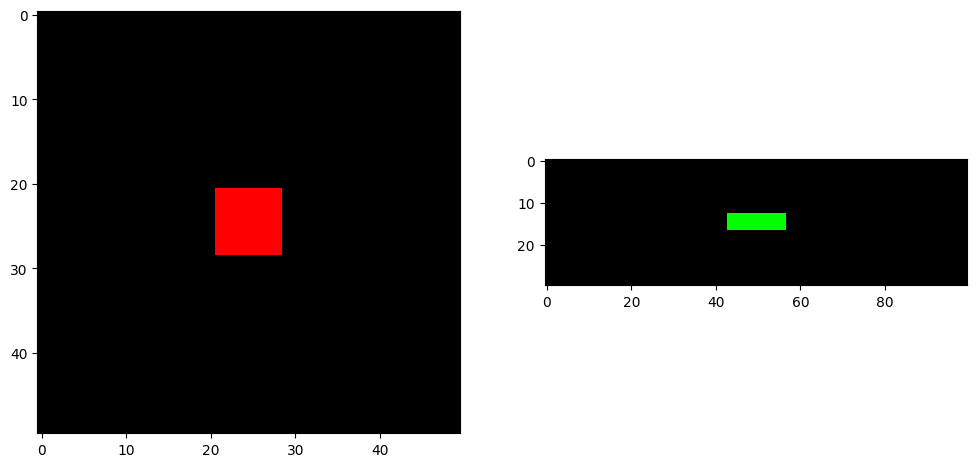

In [97]:
img_array = render.render_threejs_scene_to_numpy(50, 50, "red")
img_array2 = render.render_threejs_scene_to_numpy(100, 30, "not_red")
show(img_array, img_array2)

LOG: Custom data from CLI: red
LOG: [GroupMarkerNotSet(crbug.com/242999)!:A0601D00F43B0000]Automatic fallback to software WebGL has been deprecated. Please use the --enable-unsafe-swiftshader flag to opt in to lower security guarantees for trusted content.
LOG: [.WebGL-0x31dc00685c00]GL Driver Message (OpenGL, Performance, GL_CLOSE_PATH_NV, High): GPU stall due to ReadPixels
LOG: Failed to load resource: the server responded with a status of 404 (Not Found)
LOG: [.WebGL-0x31dc00685c00]GL Driver Message (OpenGL, Performance, GL_CLOSE_PATH_NV, High): GPU stall due to ReadPixels



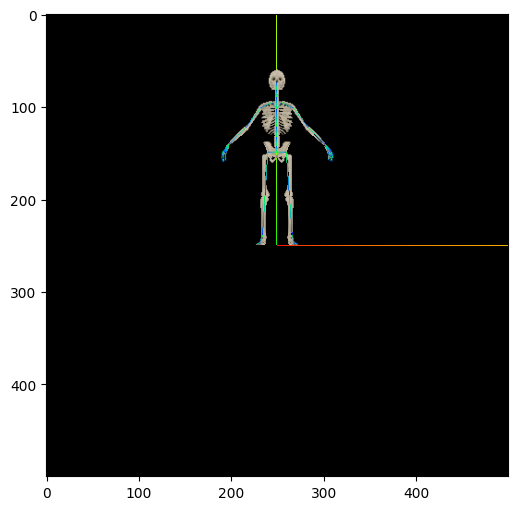

In [ ]:
img_array = render.render_threejs_scene_to_numpy(500, 500, print_err=True)
show(img_array)

LOG: Custom data from CLI: JSHandle@object
LOG: [GroupMarkerNotSet(crbug.com/242999)!:A0901D005C0C0000]Automatic fallback to software WebGL has been deprecated. Please use the --enable-unsafe-swiftshader flag to opt in to lower security guarantees for trusted content.
LOG: [.WebGL-0x3d64006caa00]GL Driver Message (OpenGL, Performance, GL_CLOSE_PATH_NV, High): GPU stall due to ReadPixels
LOG: [.WebGL-0x3d64006caa00]GL Driver Message (OpenGL, Performance, GL_CLOSE_PATH_NV, High): GPU stall due to ReadPixels



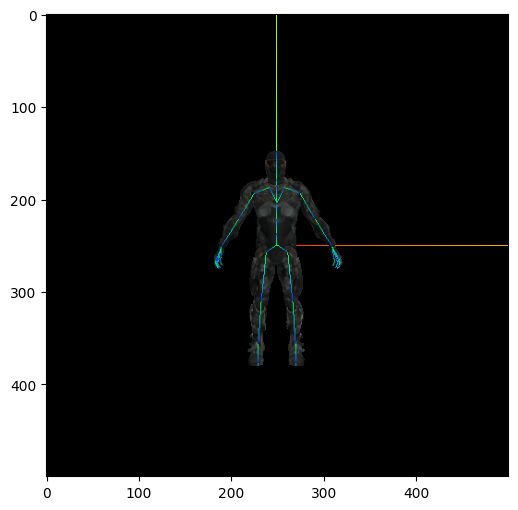

In [184]:
img_array = render.render_threejs_scene_to_numpy(500, 500, print_err=True)
show(img_array)

In [ ]:
# do not run
from module.skeleton import *

In [ ]:
from typing import cast
if "skeleton" in sys.modules:
    importlib.reload(sys.modules["skeleton"])
from skeleton import * # type: ignore

W0000 00:00:1748200401.745789 2195272 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748200401.916110 2195271 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748200402.732130 2195272 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748200403.103460 2195271 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


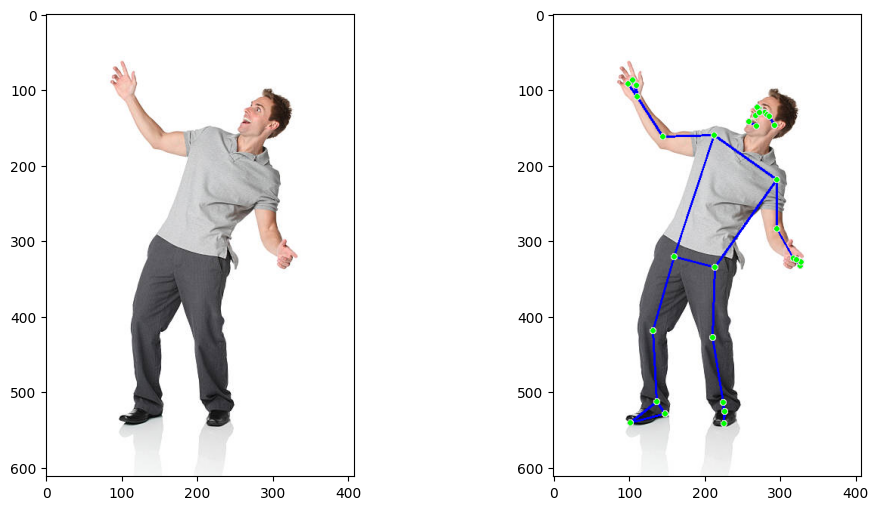

In [244]:
img_dir = os.path.join(WORKSPACE_DIR, "resources", "images")
img_names = "man_lean.jpg".split()
test_images = [cv2.imread(os.path.join(img_dir, name)) for name in img_names]

images_to_draw = (img for orig_img in test_images for img in (orig_img, draw_skeleton(orig_img, True)))
show(*images_to_draw)

In [380]:
bone_map = {
    # "Hips": PoseLandmark.LEFT_HIP,  # Центр таза ≈ среднее двух бёдер
    # "Spine": PoseLandmark.LEFT_HIP,  # Условно между тазом и плечами
    # "Spine1": PoseLandmark.LEFT_SHOULDER,  # Среднее между плечами
    # "Neck": PoseLandmark.NOSE,
    # "Head": PoseLandmark.NOSE,
    # "LeftShoulder": PoseLandmark.LEFT_SHOULDER,
    "LeftArm": PoseLandmark.LEFT_SHOULDER,
    "LeftForeArm": PoseLandmark.LEFT_ELBOW,
    "LeftHand": PoseLandmark.LEFT_WRIST,
    # "RightShoulder": PoseLandmark.RIGHT_SHOULDER,
    "RightArm": PoseLandmark.RIGHT_SHOULDER,
    "RightForeArm": PoseLandmark.RIGHT_ELBOW,
    "RightHand": PoseLandmark.RIGHT_WRIST,
    "LeftUpLeg": PoseLandmark.LEFT_HIP,
    "LeftLeg": PoseLandmark.LEFT_KNEE,
    "LeftFoot": PoseLandmark.LEFT_ANKLE,
    "RightUpLeg": PoseLandmark.RIGHT_HIP,
    "RightLeg": PoseLandmark.RIGHT_KNEE,
    "RightFoot": PoseLandmark.RIGHT_ANKLE,
    # "LeftToe_End": PoseLandmark.LEFT_FOOT_INDEX,
    # "RightToe_End": PoseLandmark.RIGHT_FOOT_INDEX,
    "LeftToeBase": PoseLandmark.LEFT_FOOT_INDEX,
    "RightToeBase": PoseLandmark.RIGHT_FOOT_INDEX,
}

In [ ]:
# lifesaver!!!
# import inspect
# inspect.getsource(interpolate_spine_bezier_numpy)

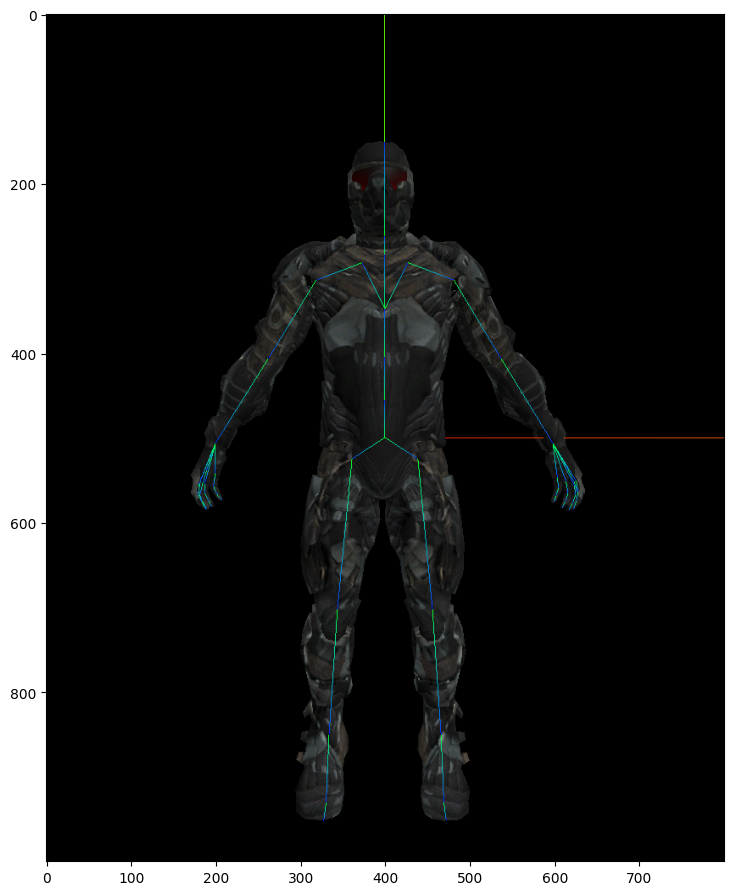

In [375]:
show(render.render_threejs_scene_to_numpy(400 * 2, 500 * 2), plot_size=11)

LOG: [.WebGL-0x1ac00664e00]GL Driver Message (OpenGL, Performance, GL_CLOSE_PATH_NV, High): GPU stall due to ReadPixels
LOG: [.WebGL-0x1ac00664e00]GL Driver Message (OpenGL, Performance, GL_CLOSE_PATH_NV, High): GPU stall due to ReadPixels



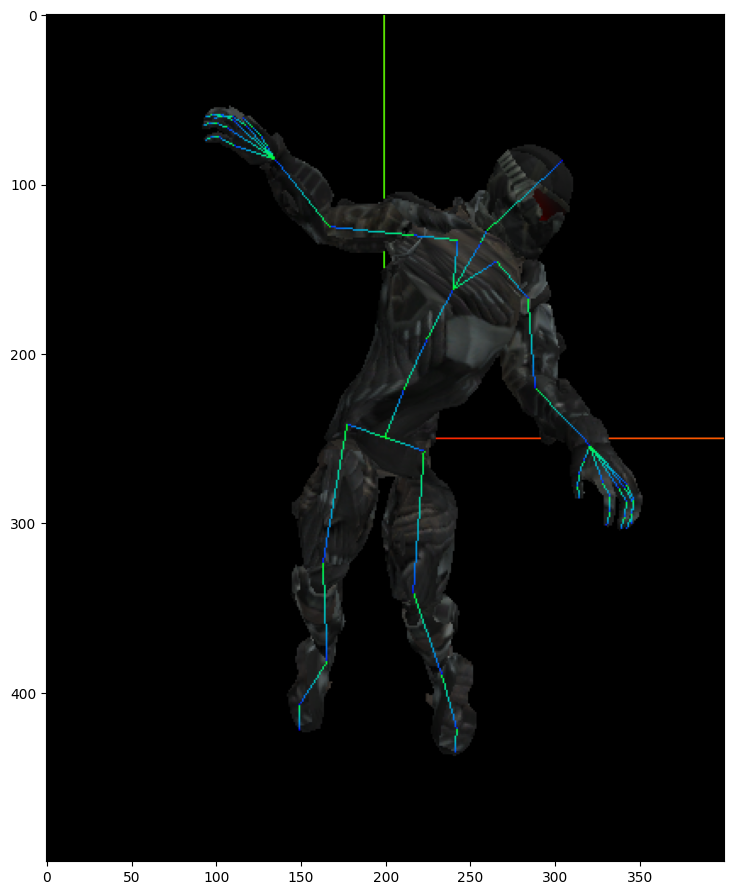

In [406]:
import numpy as np


def get_head_info(pose_landmarks: PoseLandmarks):
    nose = pose_landmarks[PoseLandmark.NOSE]
    left_ear = pose_landmarks[PoseLandmark.LEFT_EAR]
    right_ear = pose_landmarks[PoseLandmark.RIGHT_EAR]

    diffs = get_diffs(right_ear, left_ear)
    yaw = np.arctan2(diffs.z, diffs.x)
    roll = np.arctan2(diffs.y, diffs.x)

    head_center = get_avg(right_ear, left_ear)
    center_to_nose_diff = get_diffs(head_center, nose)
    pitch = np.arctan2(center_to_nose_diff.y, -center_to_nose_diff.z)

    return {"rotation": [yaw, roll, pitch]}


def interpolate_spine_bezier_numpy(hips: Landmark, neck: Landmark, control_offset=0.1):
    hips_np = np.array(get_pos_list(hips))
    neck_np = np.array(get_pos_list(neck))

    mid = (hips_np + neck_np) / 2

    up = np.array([0, -1, 0])
    forward = np.cross(neck_np - hips_np, up)
    forward /= np.linalg.norm(forward) + 1e-6

    control = mid + control_offset * forward

    t_values = [0.25, 0.5, 0.75]
    bezier_quadratic = lambda p0, p1, p2, t: (1 - t) ** 2 * p0 + 2 * (1 - t) * t * p1 + t**2 * p2
    bezier_points = [bezier_quadratic(hips_np, control, neck_np, t) for t in t_values]

    return {
        "mixamorigSpine": {"position": bezier_points[0].tolist()},
        "mixamorigSpine1": {"position": bezier_points[1].tolist()},
        "mixamorigSpine2": {"position": bezier_points[2].tolist()},
    }


def get_avatar_coordinates(image: cv2.typing.MatLike) -> ResultData:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pose_results = cast(PoseResult, pose.process(image_rgb))
    # landmarks_container = pose_results.pose_landmarks
    landmarks_container = pose_results.pose_world_landmarks
    if not landmarks_container:
        return {}
    landmarks = landmarks_container.landmark

    rig_info = {}
    data = {"body": rig_info}

    # compute position
    between_ears = get_avg(PoseLandmark.LEFT_EAR, PoseLandmark.RIGHT_EAR, container=landmarks)
    between_shoulders = get_avg(PoseLandmark.LEFT_SHOULDER, PoseLandmark.RIGHT_SHOULDER, container=landmarks)
    between_hips = get_avg(PoseLandmark.LEFT_HIP, PoseLandmark.RIGHT_HIP, container=landmarks)

    rig_info["mixamorigHips"] = {"position": get_pos_list(between_hips)}  # always 0 in 3d

    neck_point = get_avg(between_shoulders, between_ears, weights=[2, 1])
    head_point = get_avg(between_shoulders, between_ears)
    spine_points = interpolate_spine_bezier_numpy(
        get_avg(PoseLandmark.LEFT_HIP, PoseLandmark.RIGHT_HIP, container=landmarks), neck_point, 0.1
    )
    rig_info.update(spine_points)

    rig_info["mixamorigLeftShoulder"] = {
        "position": get_pos_list(get_avg(landmarks[PoseLandmark.LEFT_SHOULDER], neck_point, weights=[1, 2]))
    }
    rig_info["mixamorigRightShoulder"] = {
        "position": get_pos_list(get_avg(landmarks[PoseLandmark.RIGHT_SHOULDER], neck_point, weights=[1, 2]))
    }

    # head_landmarks = get_head_info(landmarks)
    rig_info["mixamorigNeck"] = {"position": get_pos_list(neck_point)}
    rig_info["mixamorigHead"] = {"position": get_pos_list(head_point)}

    for model_bone_short, mp_landmark in bone_map.items():
        model_bone = f"mixamorig{model_bone_short}"
        rig_info[model_bone] = {"position": get_pos_list(landmarks[mp_landmark])}

    # draw points
    # TODO: update ResultData type to include debug points
    data["points"] = []  # type: ignore

    # compute rotation
    # shoulders_diff = get_diffs(landmarks[PoseLandmark.RIGHT_SHOULDER], landmarks[PoseLandmark.LEFT_SHOULDER])
    # spine_yaw = np.arctan2(shoulders_diff.z, shoulders_diff.x)
    # top = get_avg(landmarks[PoseLandmark.LEFT_SHOULDER], landmarks[PoseLandmark.RIGHT_SHOULDER])
    # bottom = get_avg(landmarks[PoseLandmark.LEFT_HIP], landmarks[PoseLandmark.RIGHT_HIP])
    # up_down_diff = get_diffs(top, bottom)
    # spine_pitch = np.arctan2(up_down_diff.z, -up_down_diff.y)
    # spine_roll = np.arctan2(up_down_diff.x, -up_down_diff.y)
    # #  yaw, roll, pitch
    # rig_info["mixamorigSpine"]["rotation"] = [spine_yaw, spine_roll, spine_pitch]

    # hips_diff = get_diffs(landmarks[PoseLandmark.RIGHT_HIP], landmarks[PoseLandmark.LEFT_HIP])
    # hip_yaw = np.arctan2(hips_diff.z, hips_diff.x)
    # hip_roll = np.arctan2(hips_diff.y, hips_diff.x)
    # r_hip_knee_diff = get_diffs(landmarks[PoseLandmark.RIGHT_HIP], landmarks[PoseLandmark.RIGHT_KNEE])
    # r_hip_pitch = np.arctan2(r_hip_knee_diff.z, -r_hip_knee_diff.y)
    # l_hip_knee_diff = get_diffs(landmarks[PoseLandmark.LEFT_HIP], landmarks[PoseLandmark.LEFT_KNEE])
    # l_hip_pitch = np.arctan2(l_hip_knee_diff.z, -l_hip_knee_diff.y)
    # hip_pitch = (r_hip_pitch + l_hip_pitch) / 2
    # #  yaw, roll, pitch
    # rig_info["mixamorigHips"] = {"rotation": [hip_yaw, hip_roll, hip_pitch]}

    return data  # type: ignore


quality_mul = 1
for img in test_images:
    coords = get_avatar_coordinates(img)
    rendered = render.render_threejs_scene_to_numpy(400 * quality_mul, 500 * quality_mul, coords, True)
    show(rendered, plot_size=11)